In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [3]:
res = pd.read_csv('data/omni.tsv', sep="\t")
res

,model,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,5.85,0.00252,0.00106,14.7,True,True,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.75,0.00108,0.00106,2.9,False,False,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.90,0.00331,0.00121,10.0,True,True,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.72,0.00120,0.00121,2.5,False,False,True
4,GENIE3,kidney collecting duct principal cell,8.78,0.00476,0.00136,1.4,True,True,True
...,...,...,...,...,...,...,...,...,...
234,scPRINT-full,microglial cell,1.81,0.00070,0.00068,35.7,True,False,False
235,scPRINT-mean,microglial cell,2.13,0.00198,0.00183,10.6,False,False,False
236,scPRINT-mean,microglial cell,8.84,0.00584,0.00183,4.5,True,True,False
237,scPRINT-class,microglial cell,1.52,0.00178,0.00183,9.1,False,False,True


In [49]:
#res = res[res.name != "endothelial cell"].iloc[:79] # first dataset
#res = res.iloc[86:149] # second dataset
#res = res.iloc[149:]

In [4]:
res['TF_only'] = res['TF_only'].replace({True: 'TF-gene only', False: "All"})
res = res.rename(columns={'TF_only': 'Format'})

In [51]:
res

,model,name,EPR,AUPRC,RAND,TF_targ,TF_enr,Format,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,5.85,0.00252,0.00106,14.7,True,TF-gene only,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.75,0.00108,0.00106,2.9,False,All,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.90,0.00331,0.00121,10.0,True,TF-gene only,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.72,0.00120,0.00121,2.5,False,All,True
4,GENIE3,kidney collecting duct principal cell,8.78,0.00476,0.00136,1.4,True,TF-gene only,True
...,...,...,...,...,...,...,...,...,...
234,scPRINT-full,microglial cell,1.81,0.00070,0.00068,35.7,True,All,False
235,scPRINT-mean,microglial cell,2.13,0.00198,0.00183,10.6,False,All,False
236,scPRINT-mean,microglial cell,8.84,0.00584,0.00183,4.5,True,TF-gene only,False
237,scPRINT-class,microglial cell,1.52,0.00178,0.00183,9.1,False,All,True


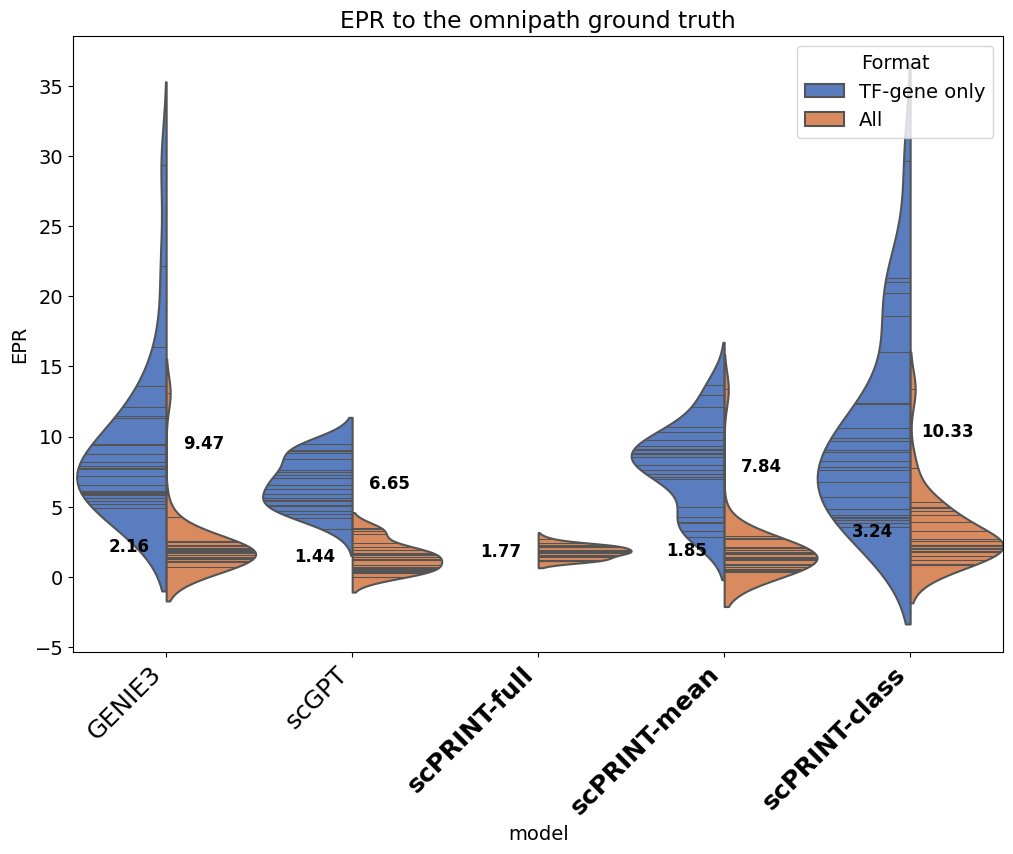

In [52]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='model', y='EPR', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['EPR'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc + offset, mean_values['EPR'][i], f"{mean_values['EPR'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Set the title and labels of the plot
violin_plot.set_title('EPR to the omnipath ground truth')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('EPR')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 1:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()


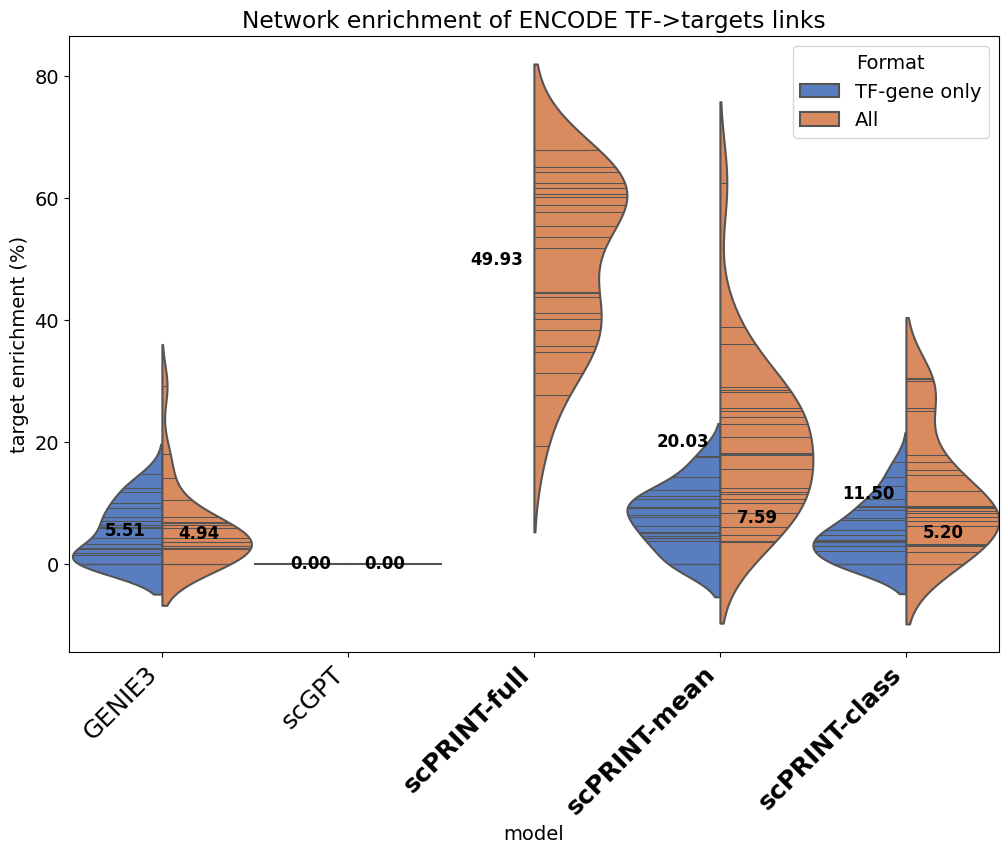

In [53]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='model', y='TF_targ', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Network enrichment of ENCODE TF->targets links')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('target enrichment (%)')
# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['TF_targ'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc+offset, mean_values['TF_targ'][i], f"{mean_values['TF_targ'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 1:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()

In [54]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

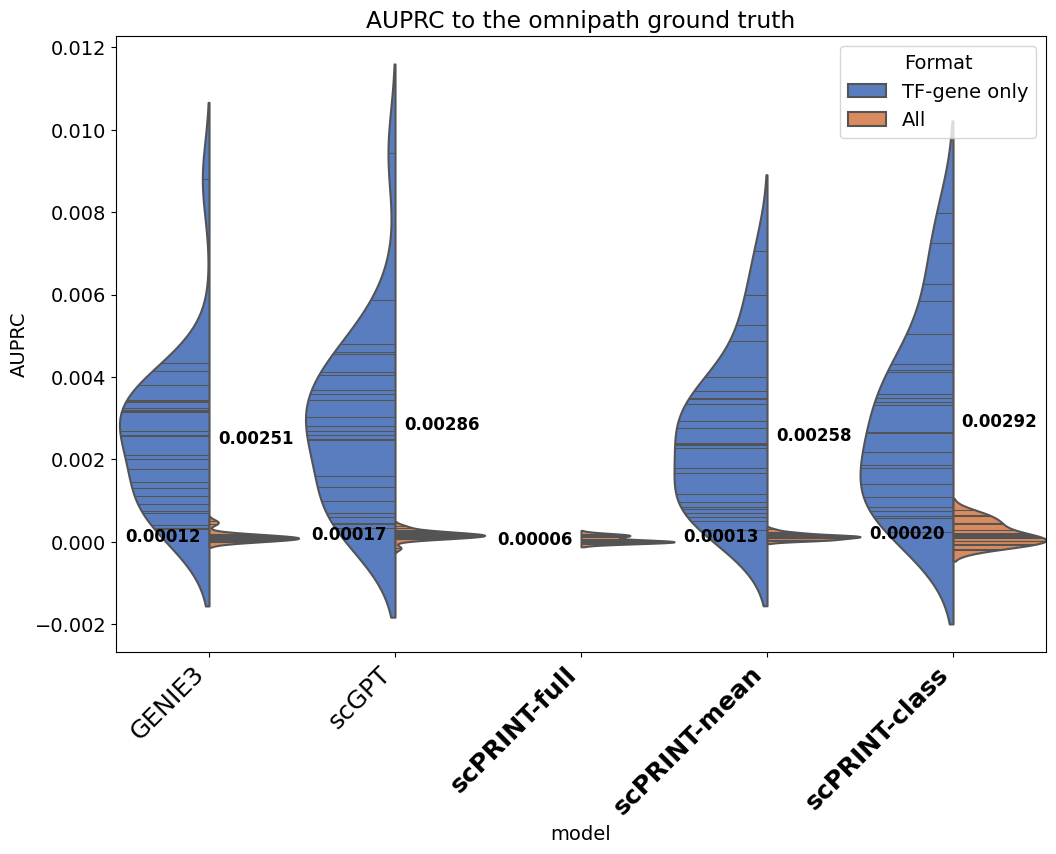

In [55]:
# Create the violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='model', y='AUPRC', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('AUPRC to the omnipath ground truth')# of different models across multiple cell type specific predictions')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('AUPRC')

mean_values = res.groupby(['model', 'Format'])['AUPRC'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.25 if mean_values['Format'][i] == 'TF-gene only' else -0.25
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(offset + xloc, mean_values['AUPRC'][i], f"{mean_values['AUPRC'][i]:.5f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Rotate the x labels for better readability and increase their size
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 1:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()

scGPT achieves very very high value for endothelial cell where it had negative value in the non TF-only mode. showing that this is likely non specific

In [6]:
tf_enr_count

,model,Count,Type
0,GENIE3,0.000000,TF_enr
1,scGPT,0.730769,TF_enr
2,scPRINT-class,0.518519,TF_enr
3,scPRINT-full,0.962963,TF_enr
4,scPRINT-mean,0.518519,TF_enr


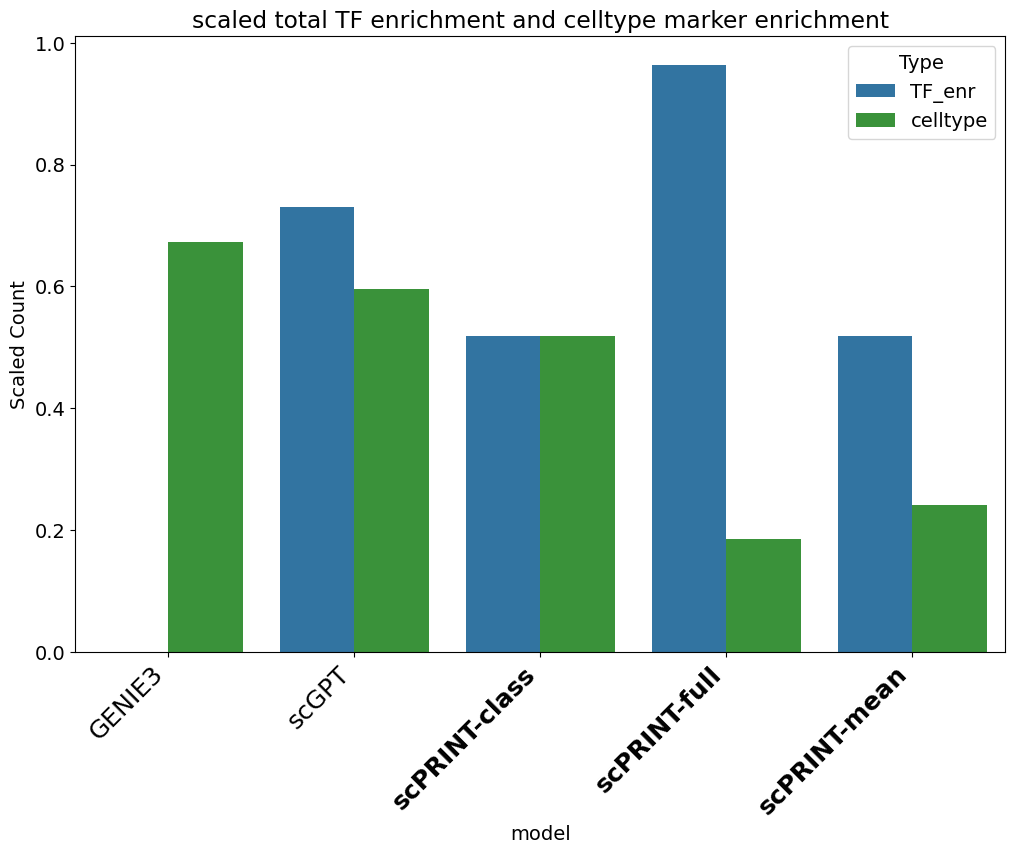

In [7]:
# Count the number of TF_enr and celltype
tf_enr_count = res[(res.Format != 'TF-gene only')].groupby(['model'])['TF_enr'].sum().reset_index()
celltype_count = res.groupby(['model'])['celltype'].sum().reset_index()

# Merge the total count with tf_enr_count and celltype_count
tf_enr_count = tf_enr_count.merge(res[(res.Format != 'TF-gene only')].groupby(['model']).size().reset_index(name='Total'), on='model')
celltype_count = celltype_count.merge(res.groupby(['model']).size().reset_index(name='Total'), on='model')

# Scale the counts by the total number of elements per model
tf_enr_count['Count'] = tf_enr_count['TF_enr'] / tf_enr_count['Total']
celltype_count['Count'] = celltype_count['celltype'] / celltype_count['Total']

# Create a new DataFrame for plotting
tf_enr_count['Type'] = 'TF_enr'
celltype_count['Type'] = 'celltype'
tf_enr_count = tf_enr_count[['model', 'Count', 'Type']]
celltype_count = celltype_count[['model', 'Count', 'Type']]
count_data = pd.concat([tf_enr_count, celltype_count])

# Create the barplot with hue for Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='model', y='Count', hue='Type', data=count_data, palette=[sns.color_palette()[0], sns.color_palette()[2]])

# Set the title and labels of the plot
bar_plot.set_title('scaled total TF enrichment and celltype marker enrichment')# counts by model  by total number of elements, excluding TF-gene only format)')
bar_plot.set_xlabel('model')
bar_plot.set_ylabel('Scaled Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 1:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()


In [18]:
res = pd.read_csv('data/sroy.tsv', sep="\t", )
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,genie3,Han et. al.,1.44,0.0292,0.0274,False
1,genie3,Han et. al. (ChIP),1.21,0.2766,0.2537,False
2,genie3,Han et. al. (KO),1.12,0.0775,0.0766,True
3,genie3,Han et. al.,1.12,0.0775,0.0766,True
4,genie3,Han et. al. (ChIP),0.78,0.2621,0.2537,True
5,genie3,Yan et. al.,2.17,0.0282,0.0247,True
6,genie3,Yan et. al.,1.09,0.0286,0.0247,False
7,genie3,Tran et. al.,1.22,0.0424,0.0405,True
8,genie3,Tran et. al. (ChIP),1.48,0.2291,0.1989,True
9,genie3,Tran et. al. (KO),0.98,0.0824,0.0796,True


In [19]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

In [21]:
filtered_res

,tool,dataset,EPR,AUPRC,RAND,TF_only
0,genie3,Han et. al.,1.44,0.0018,0.0274,False
3,genie3,Han et. al.,1.12,0.0009,0.0766,True
5,genie3,Yan et. al.,2.17,0.0035,0.0247,True
6,genie3,Yan et. al.,1.09,0.0039,0.0247,False
7,genie3,Tran et. al.,1.22,0.0019,0.0405,True
10,genie3,Tran et. al.,0.97,-0.0059,0.0796,False
13,genie3,Zhao et. al.,1.62,0.0046,0.0531,True
14,genie3,Zhao et. al.,1.06,0.0048,0.0531,False
15,scGPT,Han et. al.,0.39,-0.0056,0.0274,False
18,scGPT,Yan et. al.,0.01,-0.0077,0.0321,False


/local/scratch/tmp/ipykernel_492284/2042312325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


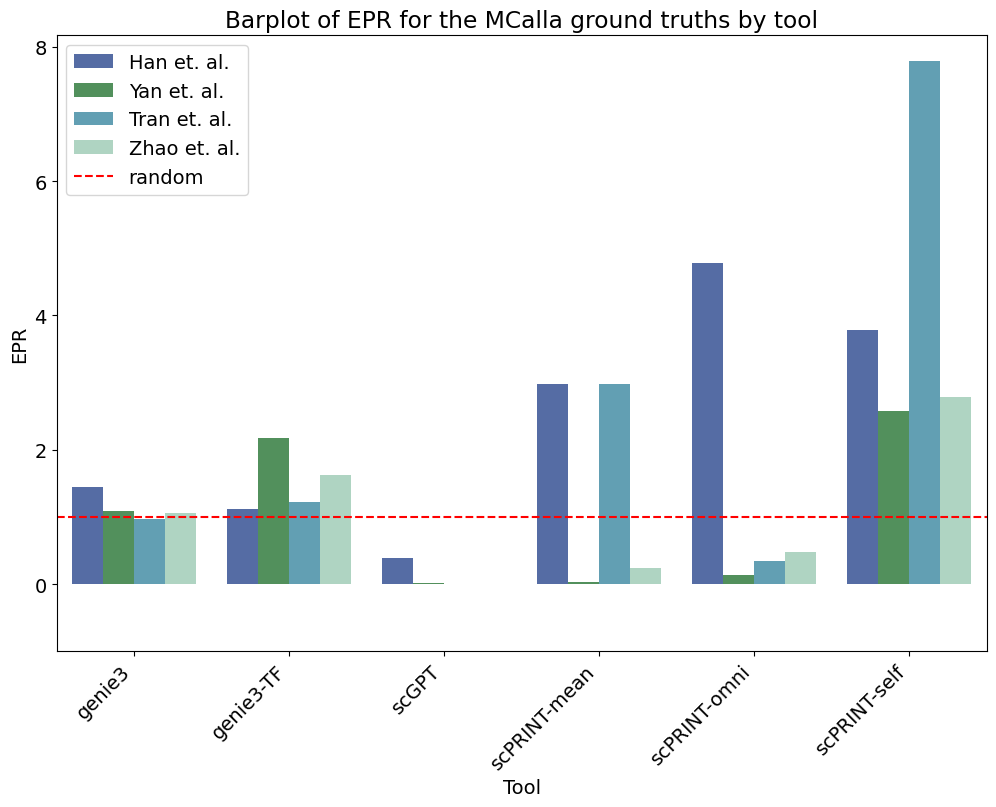

In [35]:
filtered_res = res[~(res['name'].str.contains('ChIP') | res['name'].str.contains('KO'))]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='EPR').reset_index()

plt.figure(figsize=(12, 8))
order = ['Han et. al.', 'Yan et. al.', 'Tran et. al.', 'Zhao et. al.']

bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'), hue_order=order, palette=['#4867B1', '#479B55', '#54A6C1', '#A9DAC2'])

# Add the random line at y=1
plt.axhline(y=1, color='r', linestyle='--', label='random')

# Set the title and labels of the plot
bar_plot.set_title('Barplot of EPR for the MCalla ground truths by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('EPR')
bar_plot.set(ylim=(-1, None))


# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend()
plt.show()


/local/scratch/tmp/ipykernel_492284/277947659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


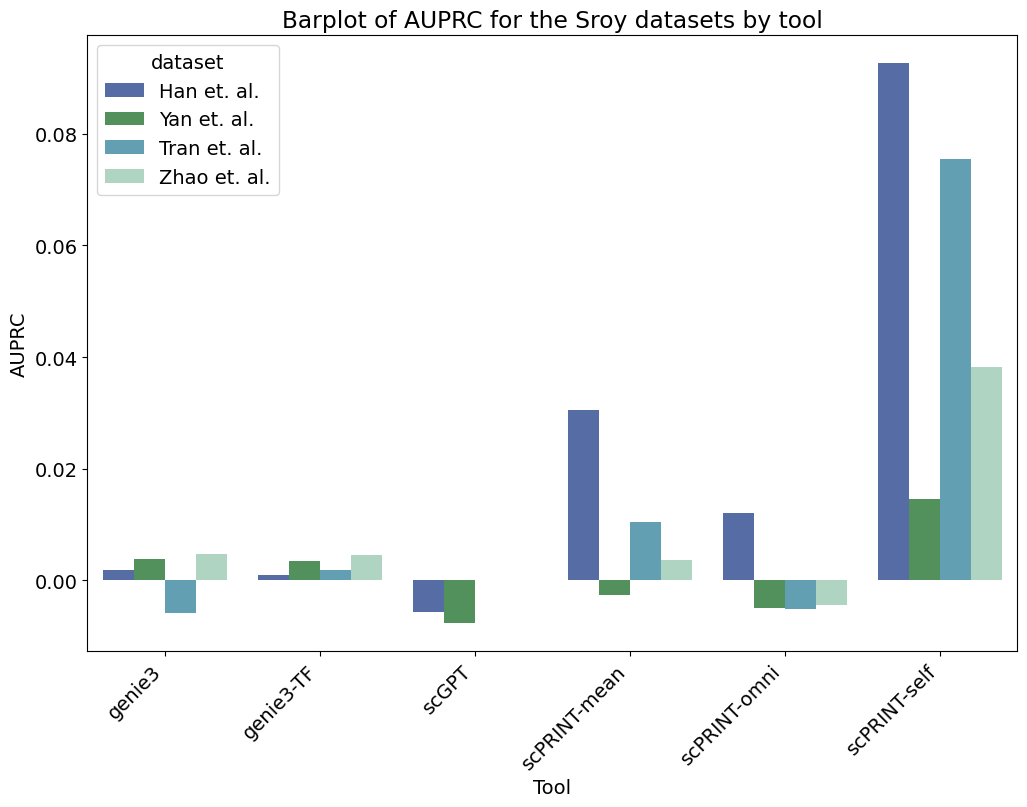

In [33]:
filtered_res = res[~(res['name'].str.contains('ChIP') | res['name'].str.contains('KO'))]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='AUPRC').reset_index()
plt.figure(figsize=(12, 8))
order = ['Han et. al.', 'Yan et. al.', 'Tran et. al.', 'Zhao et. al.']
bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'), hue_order=order, palette=['#4867B1', '#479B55', '#54A6C1', '#A9DAC2'])

# Set the title and labels of the plot
bar_plot.set_title('Barplot of AUPRC for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('AUPRC')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()